<a href="https://colab.research.google.com/github/das2002/Remote-Sensing-Beaverworks/blob/master/04_Intro_to_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Networks
The study of networks investigates the relationship between discrete objects using [graphs](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))

![network_diagram](https://upload.wikimedia.org/wikipedia/commons/2/2f/Small_Network.png)

Graphs are a mathematical structure which represent a set of objects (called nodes or vertices) as well as their symmetric or asymmetric relationships (called links or edges).

They can be used to represent both physical systems (roads, pipelines, electrical grid) and abstract systems (social, collaboration, genetics).

For this course, we'll be using the python `networkx` package, which provides many useful classes and functions for representing and doing computations with networks. 

In addition, we'll be using the `osmnx` package, which will download openstreetmap road networks as `networkx` objects. There are a ton of useful examples in the [examples repo](https://github.com/gboeing/osmnx-examples).

This lecture is based off of the [osmnx-examples](https://github.com/gboeing/osmnx-examples) code and the [Automating GIS Processes](https://automating-gis-processes.github.io/2018/notebooks/L6/retrieve_osm_data.html) course.

In [0]:
import networkx as nx
try:
  import osmnx as ox
except:
  # osmnx depends on the system package libspatialindex
  !apt install libspatialindex-dev
  !pip install osmnx
  import osmnx as ox

try: 
  import geopandas as gpd
except: 
  !pip install geopandas 
  import geopandas as gpd
  
try:
  import contextily as ctx 
except:
  # install dependencies for contextily
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  # install contextily
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
  import contextily as ctx
  
import fiona
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt
import numpy as np

In [0]:
# Specify the name that is used to seach for the data
place_name = "Cambridge, MA, USA"

# Fetch OSM street network from the location
# this will take a while because there's a lot of streets
graph = ox.graph_from_place(place_name)

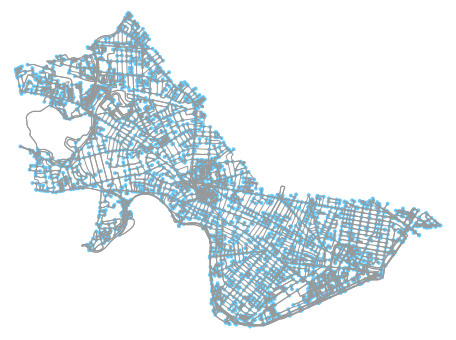

In [0]:
# Let's take a look at the graph
fig, ax = ox.plot_graph(graph)

In [0]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [0]:
print(nx.adjacency_matrix(graph))

  (0, 3508)	1
  (0, 3791)	1
  (0, 5347)	1
  (1, 3274)	1
  (1, 3791)	1
  (1, 5258)	1
  (2, 3)	1
  (2, 3274)	1
  (2, 5004)	1
  (3, 2)	1
  (4, 5)	1
  (4, 146)	2
  (5, 4)	1
  (5, 6)	1
  (5, 2138)	1
  (6, 5)	1
  (6, 148)	1
  (6, 3483)	1
  (6, 3560)	1
  (7, 1721)	1
  (8, 19)	1
  (9, 18)	1
  (9, 1192)	1
  (9, 2217)	1
  (10, 12)	1
  :	:
  (5339, 3489)	1
  (5339, 5334)	1
  (5340, 187)	1
  (5340, 4291)	1
  (5340, 5335)	1
  (5341, 1811)	1
  (5341, 4305)	1
  (5341, 5337)	1
  (5342, 4291)	1
  (5342, 4323)	1
  (5342, 5343)	1
  (5343, 3770)	1
  (5343, 5337)	1
  (5343, 5342)	1
  (5344, 1712)	1
  (5344, 5348)	1
  (5345, 5348)	1
  (5346, 1712)	1
  (5346, 5348)	1
  (5347, 0)	1
  (5347, 3775)	1
  (5347, 4305)	1
  (5348, 5344)	1
  (5348, 5345)	1
  (5348, 5346)	1


In [0]:
# we can project the graph into meters using the .project_graph() function
graph_proj = ox.project_graph(graph)

# we can then convert the graph to a geodataframe
graph_nodes_gdf, graph_edges_gdf = ox.graph_to_gdfs(graph_proj)
graph_nodes_gdf

,highway,lat,lon,osmid,x,y,geometry
3809869824,NaN,42.379348,-71.114121,3809869824,325953.557084,4.694061e+06,POINT (325953.5570839992 4694061.020659996)
3809869827,NaN,42.379540,-71.115105,3809869827,325873.110827,4.694084e+06,POINT (325873.1108272957 4694084.434100504)
3809869832,NaN,42.379899,-71.115190,3809869832,325867.087174,4.694124e+06,POINT (325867.0871741724 4694124.406627723)
3809869833,NaN,42.379901,-71.115211,3809869833,325865.356403,4.694125e+06,POINT (325865.3564028515 4694124.705273405)
61325324,NaN,42.381839,-71.145287,61325324,323394.711356,4.694402e+06,POINT (323394.7113556716 4694401.977837317)
61325327,NaN,42.381273,-71.145167,61325327,323403.010394,4.694339e+06,POINT (323403.0103940551 4694338.822040545)
61325339,NaN,42.380887,-71.145653,61325339,323361.925339,4.694297e+06,POINT (323361.9253393767 4694296.969385642)
325353499,NaN,42.396073,-71.139595,325353499,323903.161359,4.695971e+06,POINT (323903.1613587608 4695970.710099252)
545538077,NaN,42.359936,-71.088419,545538077,328016.656844,4.691853e+06,POINT (328016.6568438745 4691853.178810574)
61325346,NaN,42.375837,-71.137517,61325346,324017.609115,4.693719e+06,POINT (324017.6091151102 4693719.372719345)


In [0]:
graph_edges_gdf

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,LINESTRING (325953.5570839992 4694061.02065999...,footway,NaN,0,NaN,29.272,NaN,NaN,False,442467370,NaN,NaN,NaN,3809869824,3809869821,NaN
1,NaN,NaN,LINESTRING (325953.5570839992 4694061.02065999...,footway,NaN,0,NaN,63.491,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869824,3809869822,NaN
2,NaN,NaN,LINESTRING (325953.5570839992 4694061.02065999...,"[footway, service]",NaN,0,NaN,117.948,NaN,NaN,False,"[442467371, 274464900]",NaN,parking_aisle,NaN,3809869824,2791796202,NaN
3,NaN,NaN,LINESTRING (325873.1108272957 4694084.43410050...,footway,NaN,0,NaN,43.755,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869827,3809869822,NaN
4,NaN,NaN,LINESTRING (325873.1108272957 4694084.43410050...,footway,NaN,0,NaN,24.897,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869827,4401457856,NaN
5,NaN,NaN,LINESTRING (325873.1108272957 4694084.43410050...,footway,NaN,0,NaN,38.177,NaN,NaN,False,"[672541002, 672541003, 672541004]",NaN,NaN,building_passage,3809869827,4470898317,NaN
6,NaN,NaN,LINESTRING (325867.0871741724 4694124.40662772...,footway,NaN,0,NaN,16.136,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869832,4401457856,NaN
7,NaN,NaN,LINESTRING (325867.0871741724 4694124.40662772...,footway,NaN,0,NaN,1.752,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869832,3809869833,NaN
8,NaN,NaN,LINESTRING (325867.0871741724 4694124.40662772...,footway,NaN,0,NaN,13.816,NaN,NaN,False,672543013,NaN,NaN,NaN,3809869832,6298024725,NaN
9,NaN,NaN,LINESTRING (325865.3564028515 4694124.70527340...,footway,NaN,0,NaN,1.752,NaN,NaN,False,377607815,NaN,NaN,NaN,3809869833,3809869832,NaN


In [0]:
# we can also get a gdf for the footprint of the place
graph_area = ox.project_gdf(ox.gdf_from_place(place_name))
graph_area

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-71.064047,42.40376,42.352522,-71.1604,"POLYGON ((322163.5587115987 4694946.66029018, ...","Cambridge, Middlesex County, Massachusetts, USA"


## Exercise
What is the total area of cambridge in sq meters?

In [0]:
graph_area.area

0    1.846390e+07
dtype: float64

## Road network statistics

In [0]:
# we can get basic stats about the network:
ox.basic_stats(graph_proj, circuity_dist='euclidean', 
               clean_intersects=True)

{'circuity_avg': 1.0702592386363303,
 'clean_intersection_count': 1966,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 52.70199803850368,
 'edge_length_total': 725443.0030000032,
 'intersection_count': 4604,
 'intersection_density_km': None,
 'k_avg': 5.146756403065994,
 'm': 13765,
 'n': 5349,
 'node_density_km': None,
 'self_loop_proportion': 0.003922993098438067,
 'street_density_km': None,
 'street_length_avg': 54.55389587852502,
 'street_length_total': 427538.88200000057,
 'street_segments_count': 7837,
 'streets_per_node_avg': 2.9495232753785756,
 'streets_per_node_counts': {0: 0,
  1: 745,
  2: 34,
  3: 3413,
  4: 1081,
  5: 57,
  6: 18,
  7: 0,
  8: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13927836978874555,
  2: 0.006356328285660871,
  3: 0.6380631893811928,
  4: 0.20209384931762947,
  5: 0.01065619742007852,
  6: 0.0033651149747616375,
  7: 0.0,
  8: 0.0001869508319312021}}

Circuity is the ratio of network distance (distance traveled along roads) to euclidean distance (straight line). Higher circuity means greater inefficiency in traveling along the roads.

Check the [documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats) for more info about each statistic

In [0]:
# if you pass in the area, you can get density info
area_cambridge_sqm = graph_area['geometry'].area
ox.basic_stats(graph_proj, circuity_dist='euclidean', 
               clean_intersects=True, area=area_cambridge_sqm)

{'circuity_avg': 1.0702592386363303,
 'clean_intersection_count': 1966,
 'clean_intersection_density_km': 0    106.478062
 dtype: float64,
 'edge_density_km': 0    39289.809375
 dtype: float64,
 'edge_length_avg': 52.70199803850368,
 'edge_length_total': 725443.0030000032,
 'intersection_count': 4604,
 'intersection_density_km': 0    249.351474
 dtype: float64,
 'k_avg': 5.146756403065994,
 'm': 13765,
 'n': 5349,
 'node_density_km': 0    289.700486
 dtype: float64,
 'self_loop_proportion': 0.003922993098438067,
 'street_density_km': 0    23155.397605
 dtype: float64,
 'street_length_avg': 54.55389587852502,
 'street_length_total': 427538.88200000057,
 'street_segments_count': 7837,
 'streets_per_node_avg': 2.9495232753785756,
 'streets_per_node_counts': {0: 0,
  1: 745,
  2: 34,
  3: 3413,
  4: 1081,
  5: 57,
  6: 18,
  7: 0,
  8: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.13927836978874555,
  2: 0.006356328285660871,
  3: 0.6380631893811928,
  4: 0.20209384931762947,
  5: 0.

In [0]:
# see more stats (mostly topological stuff) with extended_stats
# Going to take a long time
# we'll first compute shortest-path and eccentricity related stats
# eccentricity of a node is the maximum distance between it and any other node
more_stats_ecc = ox.extended_stats(graph, ecc=True, 
                                   bc=False, cc=False) 
#use arguments to turn other toplogical analyses on/off
for key in sorted(more_stats_ecc.keys()):
    print(key)



avg_neighbor_degree
avg_neighbor_degree_avg
avg_weighted_neighbor_degree
avg_weighted_neighbor_degree_avg
center
clustering_coefficient
clustering_coefficient_avg
clustering_coefficient_weighted
clustering_coefficient_weighted_avg
degree_centrality
degree_centrality_avg
diameter
eccentricity
pagerank
pagerank_max
pagerank_max_node
pagerank_min
pagerank_min_node
periphery
radius


In [0]:
# you can get a specific quantity
more_stats_ecc['eccentricity']

{3809869824: 4841.541000000002,
 3809869827: 4784.175000000002,
 3809869832: 4796.811000000001,
 3809869833: 4798.563,
 61325324: 7373.724999999998,
 61325327: 7309.319999999998,
 325353499: 7792.173999999997,
 61325339: 7334.466999999998,
 545538077: 7644.027999999997,
 61325346: 6445.642999999999,
 61325352: 6697.544999999999,
 61325354: 6732.723999999999,
 61325356: 6651.605,
 61325357: 6695.350999999999,
 5720178737: 7424.8179999999975,
 621117489: 7313.4379999999965,
 4978327603: 6744.476999999997,
 1053524026: 7378.379999999998,
 61325373: 6493.335999999999,
 545538115: 7636.852999999996,
 545538116: 7658.586999999997,
 545538117: 7665.310999999996,
 1053524038: 7259.019999999997,
 1053524048: 7384.681999999997,
 61325416: 5338.949,
 2292105322: 7533.454999999998,
 61325420: 4910.289000000002,
 61325426: 7554.3589999999995,
 61325428: 4994.044999999999,
 2292105334: 7514.340999999998,
 61325432: 4830.029000000002,
 61325436: 6014.8550000000005,
 61325438: 6039.6140000000005,
 613

In [0]:
nx.betweenness_centrality(graph)

{3809869824: 0.002908110807562538,
 3809869827: 0.0019457947660979046,
 3809869832: 0.0005356084055545325,
 3809869833: 0.0,
 61325324: 0.00023215864919019975,
 61325327: 0.0018135469051805994,
 61325339: 0.001946990235439031,
 325353499: 0.0,
 545538077: 0.0,
 61325346: 0.0030794075075205145,
 61325352: 0.0,
 61325354: 0.0,
 61325356: 0.0017018846105234483,
 61325357: 0.0011207386544189297,
 5720178737: 0.009320133148392425,
 621117489: 0.004203192113222158,
 4978327603: 0.10518004500440196,
 1053524026: 0.005401545364895734,
 61325373: 0.0,
 545538115: 0.002108117653258854,
 545538116: 0.0033739245769719615,
 545538117: 0.0,
 1053524038: 0.006314878855602264,
 1053524048: 0.002396384421915197,
 61325416: 0.002236205960073236,
 2292105322: 0.0,
 61325420: 0.10084933894416158,
 61325426: 0.002196056071425105,
 61325428: 0.010316008922782444,
 2292105334: 0.0007459148833134538,
 61325432: 0.008719268132866491,
 61325436: 0.003133540964858568,
 61325438: 0.0008162106034178685,
 61325439:

There's a lot of stats in the extended_stats:

`degree`of a node is the number of other nodes it's connected

average Neighbor degree is the degree of each nodes' neighbors
   - avg_neighbor_degree

average neighbor degree average is the average over the whole graph
   - avg_neighbor_degree_avg

weighted neighbor degree weights by edge weight (e.g. distance/travel time)
   - avg_weighted_neighbor_degree
   - avg_weighted_neighbor_degree_avg

Degree centrality is a centrality measure based on the degree of each node
   - degree_centrality
   - degree_centrality_avg
   
Clustering coefficient corresponds to how "cliquey" a graph is. It's the fraction of neighbors which are connected to one another
   - clustering_coefficient
   - clustering_coefficient_avg
   - clustering_coefficient_weighted
   - clustering_coefficient_weighted_avg
   
[Pagerank](https://en.wikipedia.org/wiki/Centrality#PageRank_centrality) is a centrality measure based on the importance of each neighbor. It's the basis of what is used as the primary ranking algorithm for Google.
   - pagerank
   - pagerank_max_node
   - pagerank_max
   - pagerank_min_node
   - pagerank_min
   
Connectivity is the minumum number of nodes/edges needed to be removed in order to separate remaining nodes into isolated subgraphs
   - node_connectivity
   - node_connectivity_avg
   - edge_connectivity
   
Eccentricity of each node is the maximum distance between each node and any other node
   - eccentricity
   
Diameter is the maximum distance between any two nodes in the graph. Radius is half of that.
   - diameter
   - radius
   
Center is the set of points with the minimum eccentricity
   - center

Periphery is the set of points with eccentricity equal to the diameter (outermost points of graph)
   - periphery
   
Betweenness is the number (or fraction) of shortest paths that go through a given edge or node
   - betweenness_centrality
   - betweenness_centrality_avg

Closeness is a weighted version of betweenness, weighted by distance
   - closeness_centrality
   - closeness_centrality_avg

## Getting data other ways
In the above example, we used the name of a place to get the data that we wanted.

However, there are other ways to specify locations which may be more convenient.

For example, you can get [graphs from address](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_address), [bounding box](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), [points](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_bbox), or [shapely polygon object](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=poly#osmnx.core.graph_from_polygon)

The types of networks you can get are:

-    `drive` - get drivable public streets (but not service roads)
-    `drive_service` - get drivable streets, including service roads
-    `walk` - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
-    `bike` - get all streets and paths that cyclists can use
-    `all` - download all non-private OSM streets and paths
-    `all_private` - download all OSM streets and paths, including private-access ones



In [0]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), (-71.080155, 42.361553),
               (-71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# convert to meters (UTM) from latlong
poly_m, poly_crs_m = ox.project_geometry(poly)
print(poly_crs_m)

# put a buffer of 1 mile (1609.34 m) to get everything w/in 1 mile
poly_with_buffer_m = poly_m.buffer(1609.34)

# convert back to lat-long
poly_with_buffer_ll, poly_crs_ll = ox.project_geometry(poly_with_buffer_m, 
                                                        crs=poly_crs_m, 
                                                        to_crs=fiona.crs.from_epsg(4326), 
                                                        to_latlong=True)

# get all walkable roads within poly
walkable_roads_near_mit = ox.graph_from_polygon(poly_with_buffer_ll, 
                                       network_type='walk',
                                       clean_periphery=True)



+proj=utm +zone=19 +ellps=WGS84 +datum=WGS84 +units=m +no_defs


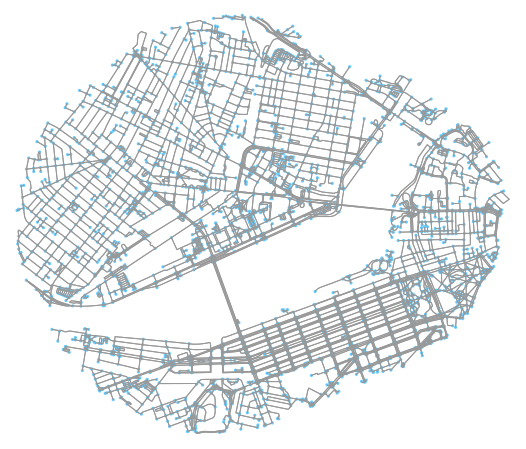

In [0]:
# let's plot it
fig, ax = ox.plot_graph(walkable_roads_near_mit, fig_height=8, node_size=10)

In [0]:
np.min(walkable_roads_near_mit.nodes(data=('x')))

-71.1141278

## Routing
We can get the node closest to a point using the `get_nearest_node` function.

{61328057: {0: {'osmid': 8615124, 'oneway': False, 'lanes': '1', 'name': 'Allston Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '8.5', 'length': 53.46}}, 61326975: {0: {'osmid': 8615124, 'oneway': False, 'lanes': '1', 'name': 'Allston Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '8.5', 'length': 47.989}}, 61326987: {0: {'osmid': 8615814, 'oneway': False, 'lanes': '1', 'name': 'Andrew Street', 'highway': 'residential', 'maxspeed': '25 mph', 'width': '9.1', 'length': 138.648}}}


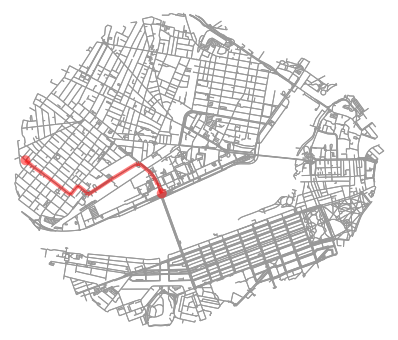

2183.3759999999997


In [0]:
orig_node = ox.get_nearest_node(walkable_roads_near_mit, (42.357602, -71.092562))

# let's calculate the route to a random destination node
rand_node = np.random.choice(walkable_roads_near_mit.nodes)
print(walkable_roads_near_mit[rand_node])
route = nx.shortest_path(walkable_roads_near_mit, 
                         orig_node, rand_node, 
                         weight='length')
fig, ax = ox.plot_graph_route(walkable_roads_near_mit, route, node_size=0)
print(nx.shortest_path_length(walkable_roads_near_mit, orig_node, 
                              rand_node, weight='length'))

## Building outlines
We can get the footprint of objects such as buildings as geodataframes with `osmnx`. Here we'll get the building footprints near MIT.

In [0]:
# we can get the footprints of objects within this poly
building_footprints = ox.footprints_from_polygon(poly_with_buffer_ll, 
                                                 footprint_type='hotel')


In [0]:
building_footprints_proj = ox.project_gdf(building_footprints)
building_footprints_proj

In [0]:
# drop rows where there's no shape info
building_footprints_proj = building_footprints_proj.loc[~building_footprints_proj['geometry'].isna()]

In [0]:
fig, ax = ox.plot_footprints(building_footprints_proj)

In [0]:
# save as a shapefile
!mkdir -p output_data
# need to drop the nodes column b/c can't store lists in shapefiles
building_footprints_proj.drop(labels='nodes',axis=1).to_file('output_data/buildings_around_mit.shp')


## Exercise
Plot the walkable roads and buildings in the area near MIT in the same figure. The `osmnx` plotting features use matplotlib on the backend. Check [the documentation](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.plot.plot_graph) for more formatting options for plotting

## Interactive graph with folium
Folium is a library which creates interactive web maps. This can be used to visualize and explore the data. However, it is slower to load and cannot scale to as large networks as the standard matplotlib plotting

In [0]:
folium_graph = ox.plot_graph_folium(walkable_roads_near_mit)
folium_graph

In [0]:
ox.plot_route_folium(walkable_roads_near_mit, route, route_map = folium_graph)

## Get places of interest
OSM can also give places of interest, like restaurants, pharmacies, hospitals, and toilets. The full list is available [here](https://wiki.openstreetmap.org/wiki/Key:amenity).

Let's 

In [0]:
restaurants = ox.pois_from_polygon(poly_with_buffer_ll, amenities=['restaurant'])
restaurants

In [0]:
walkable_nodes, walkable_edges = ox.graph_to_gdfs(walkable_roads_near_mit)

In [0]:
# plot roads, buildings, and restaurants
fig, ax = plt.subplots(1,1, figsize=[20,20])
building_footprints.plot(ax=ax)
walkable_edges.plot(ax=ax, color='black')
restaurants.plot(ax=ax, color='#FF0099', markersize=20)
plt.show()

# Exercise
In groups of 3, pick a location, ask an interesting question, do an analysis to answer that question.

